# Lab 4.05 - Bivariate Analysis of Qualitative Data


In [3]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 5 - Survey of Australian Students

Load the data file data/survey.csv. It contains the result of a survey of students from an Australian university.

We want to investigate the relationship between some discrete (nominal or ordinal) variables in this dataset. For any pairs of variables listed below, follow these steps:

* First, think about what exactly you expect for the given combination of variables.
* Make a frequency table for the two variables. The (presumably) independent variable comes first.
* Plot a graph visualizing the relationship between the two variables.
- Looking at the chart, do you expect a rather high or rather low value for the $\chi^2$ statistic? Why?
* Run the $\chi^2$ test to determine whether there is a relationship between the two variables. Calculate the $\chi^2$ statistic, the critical limit $g$ and the $p$ value, each for significance level $\alpha = 0.05$.
* Should we accept or reject the null hypothesis? What exactly does that mean for the relationship between the two variables? In other words, formulate an answer to the research question.
* Calculate Cramér's V. Do you come to a similar conclusion as with the $\chi^2$ test?


The variables to be investigated:

| Independent variabele          | Dependent variabele                        |
|:------------------------------ |:-------------------------------------------|
| `Exer` (practicing sports)     | `Smoke`                                    |
| `Sex` (gender)                 | `Smoke`                                    |
| `W.Hnd` (dominant hand)        | `Fold` (top hand when you cross your arms) |
| `Sex`                          | `W.Hnd`                                    |

Results of the main calculations (rounded up to 3 decimal places):

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

Read the dataset.

In [4]:
survey = pd.read_csv('../data/survey.csv', keep_default_na=False, na_values=["NA"], index_col=0)
survey.Exer = survey.Exer.astype(CategoricalDtype(categories=["None", "Some", "Freq"], ordered=True))
survey.Smoke = survey.Smoke.astype(CategoricalDtype(categories=['Never', 'Occas', 'Regul', 'Heavy'], ordered=True))

survey.head()

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
2,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.8,Imperial,17.583
3,Male,18.0,13.3,Right,L on R,87.0,Neither,None,Occas,NaN,NaN,16.917
4,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


What are the different values for Exer and Smoke?  
Change both variables to ordinal variables with a specific order.

In [5]:
survey.Exer.value_counts()

Exer
Freq    115
Some     98
None     24
Name: count, dtype: int64

In [6]:
survey.Smoke.value_counts()

Smoke
Never    189
Occas     19
Regul     17
Heavy     11
Name: count, dtype: int64

* Make a frequency table for the two variables. The (presumably) independent variable comes first.
* Plot a graph visualizing the relationship between the two variables.
* Looking at the chart, do you expect a rather high or rather low value for the  χ2  statistic? Why?
* Run the  χ2  test to determine whether there is a relationship between the two variables. Calculate the  χ2  statistic, the critical limit  g  and the  p  value, each for significance level  α=0.05 .
* Should we accept or reject the null hypothesis? What exactly does that mean for the relationship between the two variables? In other words, formulate an answer to the research question.
* Calculate Cramér's V. Do you come to a similar conclusion as with the  χ2  test?

The variables to be investigated:

| Independent variabele          | Dependent variabele                        |
|:------------------------------ |:-------------------------------------------|
| `Exer` (practicing sports)     | `Smoke`                                    |
| `Sex` (gender)                 | `Smoke`                                    |
| `W.Hnd` (dominant hand)        | `Fold` (top hand when you cross your arms) |
| `Sex`                          | `W.Hnd`                                    |

Results of the main calculations (rounded up to 3 decimal places):

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

Exer/Smoke: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483

In [7]:
exer_smoke = pd.crosstab(survey.Smoke, survey.Exer)
exer_smoke

Exer,None,Some,Freq
Smoke,,,
Never,18,84,87
Occas,3,4,12
Regul,1,7,9
Heavy,1,3,7


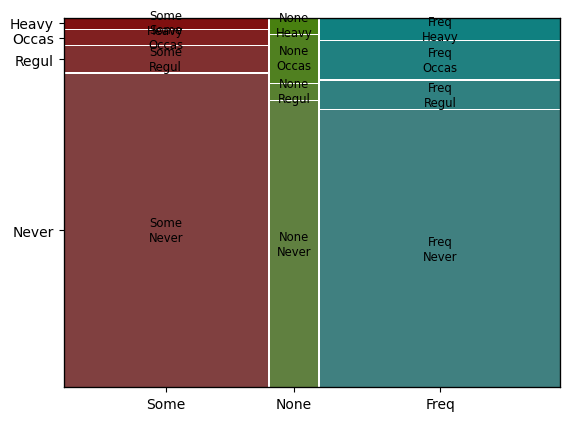

In [8]:
mosaic(data=survey, index=['Exer','Smoke']);

In [9]:
chi2, p, df, expected = stats.chi2_contingency(exer_smoke)

chi2, p, df, expected #Geen verband!

(np.float64(5.488545890584233),
 np.float64(0.48284216946545644),
 6,
 array([[18.41949153, 78.48305085, 92.09745763],
        [ 1.85169492,  7.88983051,  9.25847458],
        [ 1.65677966,  7.05932203,  8.28389831],
        [ 1.0720339 ,  4.56779661,  5.36016949]]))

In [10]:
g = stats.chi2.isf(0.05, df = df)
print("Critical value     : %.4f" % g)
#NOTE geen reden om H0 te verwerpen

Critical value     : 12.5916


W.Hnd/Fold: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454

In [20]:
whnd_fold = pd.crosstab(survey["W.Hnd"], survey["Fold"])
whnd_fold

Fold,L on R,Neither,R on L
W.Hnd,,,
Left,10,1,7
Right,88,17,113


In [23]:
chi2, p, df, expected = stats.chi2_contingency(whnd_fold)

g = stats.chi2.isf(0.05, df = df)


print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.4f" % p) # groter dan alpha dus niet verwerpen

Chi-squared        χ² = 1.5814
Critical value      g = 5.9915
p-value             p = 0.4535


Sex/Smoke: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314

In [22]:
sex_smoke = pd.crosstab(survey["Sex"], survey["Smoke"])
sex_smoke

Smoke,Never,Occas,Regul,Heavy
Sex,,,,
Female,99,9,5,5
Male,89,10,12,6


In [24]:
chi2, p, df, expected = stats.chi2_contingency(sex_smoke)

g = stats.chi2.isf(0.05, df = df)


print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.4f" % p) # groter dan alpha dus niet verwerpen

Chi-squared        χ² = 3.5536
Critical value      g = 7.8147
p-value             p = 0.3139


Sex/W.Hnd: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

In [25]:
sex_Whnd = pd.crosstab(survey["Sex"], survey["W.Hnd"])
sex_Whnd

W.Hnd,Left,Right
Sex,,
Female,7,110
Male,10,108


In [28]:
chi2, p, df, expected = stats.chi2_contingency(sex_Whnd)

g = stats.chi2.isf(0.05, df = df)


print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.4f" % p) # groter dan alpha dus niet verwerpen

Chi-squared        χ² = 0.2356
Critical value      g = 3.8415
p-value             p = 0.6274
